In [3]:
import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
from pandas.plotting import scatter_matrix

import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from matplotlib import pyplot
rcParams['figure.figsize'] = 15, 6

random_state = 16

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection  import GridSearchCV
from sklearn.model_selection  import RandomizedSearchCV

from sklearn.ensemble import VotingClassifier

In [4]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

# Dataset: Titanic- https://www.kaggle.com/c/titanic/data

Nous avons décidé d'utiliser le dataset Titanic pour ce projtet. Une descrition du dataset est la suivante:

Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

#### Description des variables

<table>
    <thead>
        <tr>
            <th>Variable</th>
            <th align="center">Definition</th>
            <th align="right">key</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>survival</td>
            <td align="center">survival</td>
            <td align="right">0 = No, 1 = Yes</td>
        </tr>
        <tr>
            <td>pclass</td>
            <td align="center">Ticket class</td>
            <td align="right">1 = 1st, 2 = 2nd, 3 = 3rd</td>
        </tr>
        <tr>
            <td>sex</td>
            <td align="center">sex</td>
            <td align="right"> </td>
        </tr>
        <tr>
            <td>Age</td>
            <td align="center">Age</td>
            <td align="right">in years</td>
        </tr>
        <tr>
            <td>sibsp</td>
            <td align="center"># of siblings / spouses aboard the Titanic</td>
            <td align="right"> </td>
        </tr>
        <tr>
            <td>parch</td>
            <td align="center"># of parents / children aboard the Titanic</td>
            <td align="right"> </td>
        </tr>
        <tr>
            <td>ticket</td>
            <td align="center">Ticket number</td>
            <td align="right"> </td>
        </tr>
        <tr>
            <td>fare</td>
            <td align="center">Passenger fare</td>
            <td align="right"> </td>
        </tr>
        <tr>
            <td>cabin</td>
            <td align="center">Cabin number</td>
            <td align="right"> </td>
        </tr>
        <tr>
            <td>embarked</td>
            <td align="center">Port of Embarkation</td>
            <td align="right"> </td>
        </tr>
    </tbody>
</table>

## 1. Analysis of the dataset 

In order to analyse the dataset, you have to:

- extract some statistical information from the given dataset, for example: the type of data, the missing values, outliers, the correlation between variables, etc. 

- This part should contain also the analysis of the domain application and explain the goal of the prediction.

In [5]:
# load data

train_file = "data/train.csv"
test_file = "data/test.csv"

raw_train = pd.read_csv(train_file, sep=",")
raw_test = pd.read_csv(test_file, sep=",")

print('Train shape: %s Test shape: %s'%(raw_train.shape, raw_test.shape))

Train shape: (891, 12) Test shape: (418, 11)


In [6]:
raw_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.000,NaN,S
333,334,0,3,"Vander Planke, Mr. Leo Edmondus",male,16.0,2,0,345764,18.000,NaN,S
518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.000,NaN,S
385,386,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.500,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S


In [7]:
raw_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
53,945,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.000,C23 C25 C27,S
222,1114,2,"Cook, Mrs. (Selena Rogers)",female,22.0,0,0,W./C. 14266,10.500,F33,S
212,1104,2,"Deacon, Mr. Percy William",male,17.0,0,0,S.O.C. 14879,73.500,NaN,S
402,1294,1,"Gibson, Miss. Dorothy Winifred",female,22.0,0,1,112378,59.400,NaN,C
197,1089,3,"Nilsson, Miss. Berta Olivia",female,18.0,0,0,347066,7.775,NaN,S


In [8]:
# Observons la variable target
raw_train.Survived.unique()

array([0, 1], dtype=int64)

Nous sommes face à un problème de classification dont le but est de créer un modèle qui prédit si un passager a survécu au naufrage du Titanic

0 = No, 1 = Yes

In [9]:
set([1,2,1])

{1, 2}

In [10]:
# Certaines varibales peuvent etre mise à l'écart dans un premier temps car n'ayant pas un pouvoir prédictif direct. 
# Celles-ci sont: **PassengerId**, **Name**, **Ticket**, **Cabin**

columns = list(set(raw_train.columns).difference(set(["PassengerId", "Name", "Ticket", "Cabin"])))
columns_test = columns.copy()
columns_test.remove("Survived")

data_train = raw_train[columns]
data_test = raw_test[columns_test]

data_train.sample(10)

,Fare,Survived,Embarked,Age,SibSp,Parch,Sex,Pclass
133,26.0000,1,S,29.0,1,0,female,2
624,16.1000,0,S,21.0,0,0,male,3
307,108.9000,1,C,17.0,1,0,female,1
28,7.8792,1,Q,NaN,0,0,female,3
543,26.0000,1,S,32.0,1,0,male,2
264,7.7500,0,Q,NaN,0,0,female,3
582,26.0000,0,S,54.0,0,0,male,2
562,13.5000,0,S,28.0,0,0,male,2
688,7.7958,0,S,18.0,0,0,male,3
824,39.6875,0,S,2.0,4,1,male,3


#### type des données

In [11]:
pd.DataFrame({'type': data_train.dtypes})

,type
Fare,float64
Survived,int64
Embarked,object
Age,float64
SibSp,int64
Parch,int64
Sex,object
Pclass,int64


In [12]:
pd.DataFrame({'type': data_test.dtypes})

,type
Fare,float64
Embarked,object
Age,float64
SibSp,int64
Parch,int64
Sex,object
Pclass,int64


#### description des données

In [13]:
data_train.describe()

,Fare,Survived,Age,SibSp,Parch,Pclass
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,32.204208,0.383838,29.699118,0.523008,0.381594,2.308642
std,49.693429,0.486592,14.526497,1.102743,0.806057,0.836071
min,0.000000,0.000000,0.420000,0.000000,0.000000,1.000000
25%,7.910400,0.000000,20.125000,0.000000,0.000000,2.000000
50%,14.454200,0.000000,28.000000,0.000000,0.000000,3.000000
75%,31.000000,1.000000,38.000000,1.000000,0.000000,3.000000
max,512.329200,1.000000,80.000000,8.000000,6.000000,3.000000


In [14]:
data_test.describe()

,Fare,Age,SibSp,Parch,Pclass
count,417.000000,332.000000,418.000000,418.000000,418.000000
mean,35.627188,30.272590,0.447368,0.392344,2.265550
std,55.907576,14.181209,0.896760,0.981429,0.841838
min,0.000000,0.170000,0.000000,0.000000,1.000000
25%,7.895800,21.000000,0.000000,0.000000,1.000000
50%,14.454200,27.000000,0.000000,0.000000,3.000000
75%,31.500000,39.000000,1.000000,0.000000,3.000000
max,512.329200,76.000000,8.000000,9.000000,3.000000


In [15]:
data_train.describe(include=['O'])

,Embarked,Sex
count,889,891
unique,3,2
top,S,male
freq,644,577


In [16]:
data_test.describe(include=['O'])

,Embarked,Sex
count,418,418
unique,3,2
top,S,male
freq,270,266


#### vérification de la présence des données manquantes dans le train

In [17]:
data_train.isnull().sum()

Fare          0
Survived      0
Embarked      2
Age         177
SibSp         0
Parch         0
Sex           0
Pclass        0
dtype: int64

In [18]:
data_test.isnull().sum()

Fare         1
Embarked     0
Age         86
SibSp        0
Parch        0
Sex          0
Pclass       0
dtype: int64

La variable Age a beaucoup de données manquantes.

Les variables **Embarked** et **Fare** en ont également

Nous remarquons la présence de données manquantes dans le train et le test. 

Nous allons devoir traiter les données manquantes du test obligatoirement afin d'obtenir une prédiction pour ces données.

In [19]:
# visualisation des données manquantes dans le train
data_train[data_train.isnull().any(axis=1)].head()

,Fare,Survived,Embarked,Age,SibSp,Parch,Sex,Pclass
5,8.4583,0,Q,NaN,0,0,male,3
17,13.0000,1,S,NaN,0,0,male,2
19,7.2250,1,C,NaN,0,0,female,3
26,7.2250,0,C,NaN,0,0,male,3
28,7.8792,1,Q,NaN,0,0,female,3


In [20]:
# visualisation des données manquantes dans le test
data_test[data_test.isnull().any(axis=1)].head()

,Fare,Embarked,Age,SibSp,Parch,Sex,Pclass
10,7.8958,S,NaN,0,0,male,3
22,31.6833,S,NaN,0,0,female,1
29,21.6792,C,NaN,2,0,male,3
33,23.4500,S,NaN,1,2,female,3
36,8.0500,S,NaN,0,0,female,3


##### Comment traiter les données manquantes?

Dans un premier temps nous allons commencer par remplacer les valeurs nulles par:

- la valeur médiane (si la variables est numérique)
- la valeur avec le mode le plus grand (si la variable est catégorielle)

**NB**: les valeurs médianes et le mode doivent etre calculés à partir des données de **Train** et non les données de **Test**

In [21]:
Age_mean = data_train['Age'].mean()
Fare_mean = data_train['Fare'].mean()
Embarked_mode = data_train['Embarked'].mode()[0]

data_train.loc[data_train['Age'].isna(), 'Age'] = Age_mean
data_test.loc[data_test['Age'].isna(), 'Age'] = Age_mean

data_train.loc[data_train['Embarked'].isna(), 'Embarked'] = Embarked_mode

data_test.loc[data_test['Fare'].isna(), 'Fare'] = Fare_mean

In [22]:
data_train.isnull().sum()

Fare        0
Survived    0
Embarked    0
Age         0
SibSp       0
Parch       0
Sex         0
Pclass      0
dtype: int64

In [23]:
data_test.isnull().sum()

Fare        0
Embarked    0
Age         0
SibSp       0
Parch       0
Sex         0
Pclass      0
dtype: int64

Nous n'avons plus de données manquantes

#### outliers

Nous allons faire une détection uni-dimensionnelle pour détecter les outliers. 

Cela va consister à regarder si les valeurs de chaque colonne correspondent bien à un domaine qui reflettent bien
la réalité.

In [24]:
data_train.describe()

,Fare,Survived,Age,SibSp,Parch,Pclass
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,32.204208,0.383838,29.699118,0.523008,0.381594,2.308642
std,49.693429,0.486592,13.002015,1.102743,0.806057,0.836071
min,0.000000,0.000000,0.420000,0.000000,0.000000,1.000000
25%,7.910400,0.000000,22.000000,0.000000,0.000000,2.000000
50%,14.454200,0.000000,29.699118,0.000000,0.000000,3.000000
75%,31.000000,1.000000,35.000000,1.000000,0.000000,3.000000
max,512.329200,1.000000,80.000000,8.000000,6.000000,3.000000


In [25]:
data_test.describe()

,Fare,Age,SibSp,Parch,Pclass
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,35.619000,30.154603,0.447368,0.392344,2.265550
std,55.840751,12.636666,0.896760,0.981429,0.841838
min,0.000000,0.170000,0.000000,0.000000,1.000000
25%,7.895800,23.000000,0.000000,0.000000,1.000000
50%,14.454200,29.699118,0.000000,0.000000,3.000000
75%,31.500000,35.750000,1.000000,0.000000,3.000000
max,512.329200,76.000000,8.000000,9.000000,3.000000


Nous n'observons aucune valeur abérante aux extrème (min, max)

Notons qu'une analyse multi-dimensionnelle (2 ou 3) serait plus adaptée. Desalgorithme de détection d'outlier tel que Isolation Forest pourrait etre utilisé (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest)

#### Visualisation des données

##### Uni dimensionnelle

In [26]:
data_train.describe()

,Fare,Survived,Age,SibSp,Parch,Pclass
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,32.204208,0.383838,29.699118,0.523008,0.381594,2.308642
std,49.693429,0.486592,13.002015,1.102743,0.806057,0.836071
min,0.000000,0.000000,0.420000,0.000000,0.000000,1.000000
25%,7.910400,0.000000,22.000000,0.000000,0.000000,2.000000
50%,14.454200,0.000000,29.699118,0.000000,0.000000,3.000000
75%,31.000000,1.000000,35.000000,1.000000,0.000000,3.000000
max,512.329200,1.000000,80.000000,8.000000,6.000000,3.000000


In [27]:
data_test.describe()

,Fare,Age,SibSp,Parch,Pclass
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,35.619000,30.154603,0.447368,0.392344,2.265550
std,55.840751,12.636666,0.896760,0.981429,0.841838
min,0.000000,0.170000,0.000000,0.000000,1.000000
25%,7.895800,23.000000,0.000000,0.000000,1.000000
50%,14.454200,29.699118,0.000000,0.000000,3.000000
75%,31.500000,35.750000,1.000000,0.000000,3.000000
max,512.329200,76.000000,8.000000,9.000000,3.000000


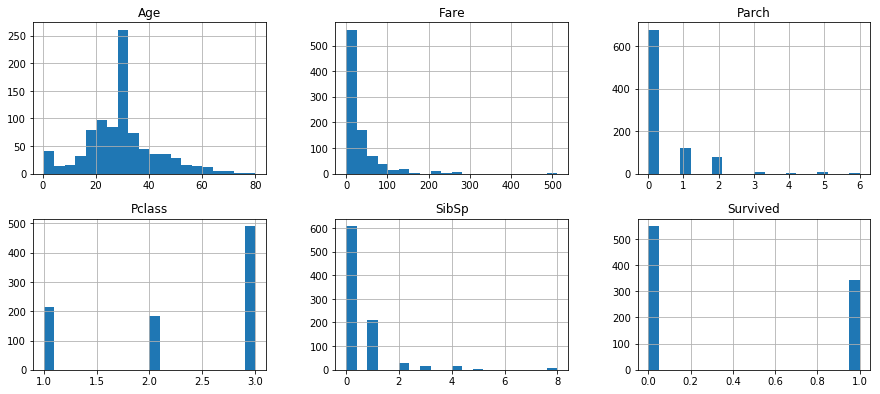

In [28]:
# Histogrammes (données numériques)
rcParams['figure.figsize'] = 15, 10
data_train.hist(layout=(3,3), bins = 20)
pyplot.show()

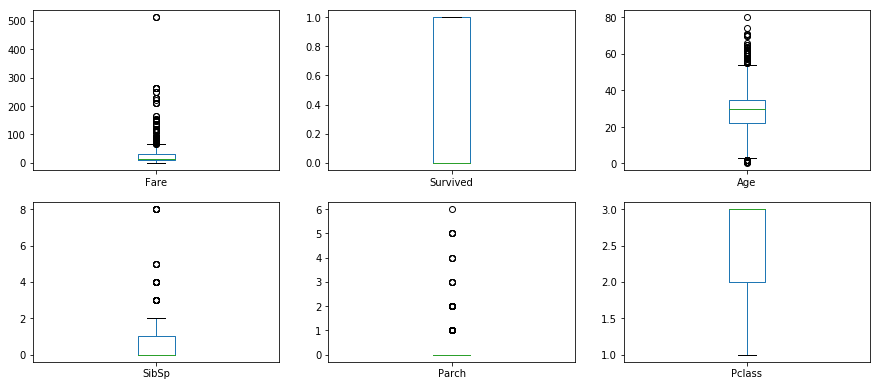

In [29]:
# Box plot
data_train.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

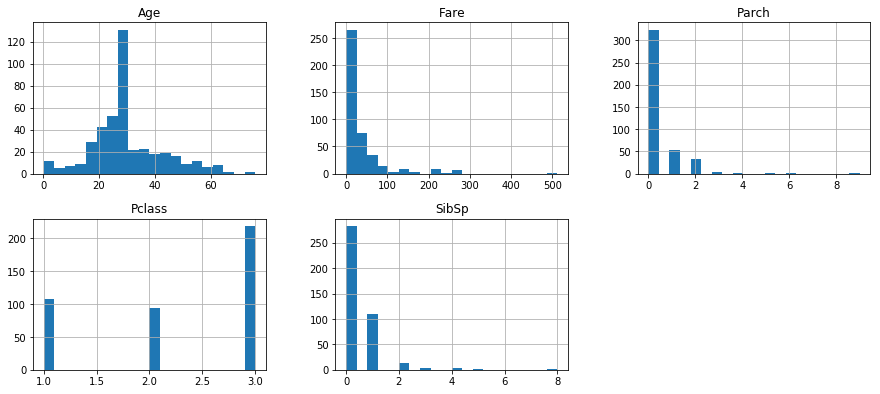

In [30]:
# Histogrammes (données numériques)
rcParams['figure.figsize'] = 15, 10
data_test.hist(layout=(3,3), bins = 20)
pyplot.show()

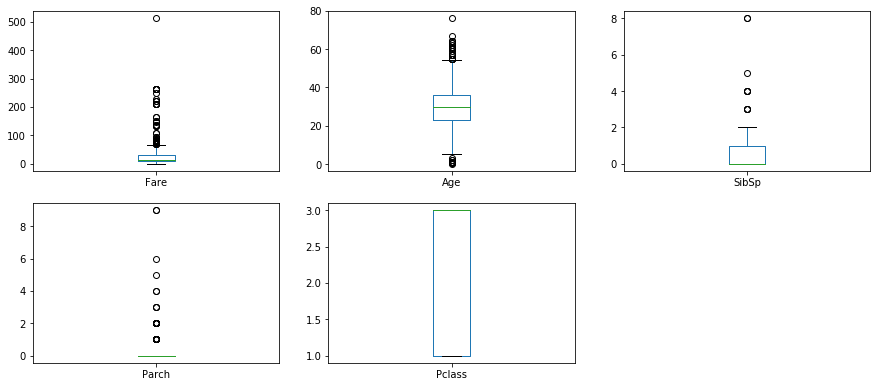

In [31]:
# Box plot
data_test.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

On remarque que:

- Les distributions de Train et Test sont assez similaires (Bonne nouvelle pour la construction des modèles)
- Parch: la plupart des passagers n'avaient pas de parents ou enfants à bord
- SiSp: la plupart des passagers avaient 0 ou 1 frères ou soeurs à bord
- Age: la moyenne d'age est autour de 25-30
- Pclass: 3 valeurs possibles. La plupart des passagers sont en 3ième classe
- Fare: La plupart des passagers payent un prix bas (cette varibale est donc lié à Pclass). prix bas => 3ième classe
- Les boxplots nous montrent des valeurs extrèmes.  Cela sera très important pour le feature engineering car nous pourrons créer des varibales supplémentaires en fonction de l'interquartile Range(IQR) ou autre sub-divisions ( < seuil ou >= seuil).

In [32]:
# distributions (données catégorielles)
print(data_train.describe(include=['object']))
print("=============================================")

for c in data_train.describe(include=['object']).columns:
    print('\n %s \n\n%s'%(c, data_train[c].value_counts()))
    print('=========================')

       Embarked   Sex
count       891   891
unique        3     2
top           S  male
freq        646   577

 Embarked 

S    646
C    168
Q     77
Name: Embarked, dtype: int64

 Sex 

male      577
female    314
Name: Sex, dtype: int64


In [33]:
# distributions (données catégorielles)
print(data_test.describe(include=['object']))
print("=============================================")

for c in data_test.describe(include=['object']).columns:
    print('\n %s \n\n%s'%(c, data_test[c].value_counts()))
    print('=========================')

       Embarked   Sex
count       418   418
unique        3     2
top           S  male
freq        270   266

 Embarked 

S    270
C    102
Q     46
Name: Embarked, dtype: int64

 Sex 

male      266
female    152
Name: Sex, dtype: int64


On remarque que:

- Embarked: la plupart des passagers sont en **S** 
- Sex: la plupart des passagers sont des **hommes**
    

##### multi-dimensionnelle

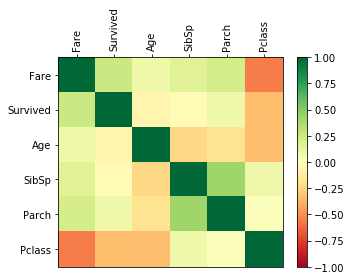

In [34]:
# correlation

# Correction Matrix Plot
def visualize_data(df, figsize=(5, 4)):
    df_corr = df.corr()
    data1 = df_corr.values
    fig1 = plt.figure(figsize=figsize)
    ax1 = fig1.add_subplot(111)
    heatmap1 = ax1.pcolor(data1, cmap=plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)
    ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1,1)
    plt.tight_layout()
    #plt.savefig("correlations.png", dpi = (300))
    plt.show()

col = list(data_train._get_numeric_data().columns)
visualize_data(data_train[col])

On remarque que:

- SibSp et Parch: la plupart des passagers voyagaient en famille

- Fare et Pclass: sont fortement correlées car la classe est étroitement lié au prix du voyage
- Age et Pclass: les séniors voyagent en 1ère classe

- Fare et Survived: les chances de survivre sont liées au prix du voyage
- Pclass et Survived: les chances de survivre sont liées au prix et donc à la classe

    

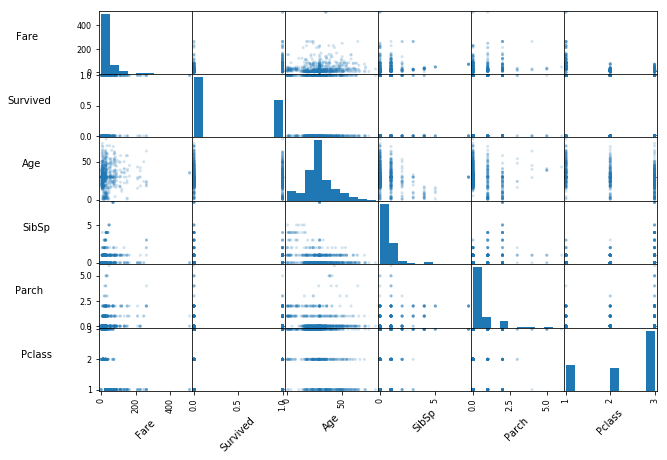

In [35]:
# Scatter Plot
axs = scatter_matrix(data_train[col], alpha=0.2 , figsize=(10, 7))
n = len(col)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = axs[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(45)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50

### Traitement des variables catégorielles

Avant tous traitements, nous allons commencer par traiter les variables catégorielles: **Embarked**, **Sex** et **Pclass**

In [36]:
data_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [37]:
data_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [38]:
data_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [39]:
def proces_dummies(data, list_dummies = ['']):
    for dummy in list_dummies:
        dummies = pd.get_dummies(data[dummy], prefix=dummy)
        if dummies.shape[1] > 1:
            dummies = dummies.iloc[:, 1:]
        data = pd.concat([data, dummies], axis=1)
#         data = data.drop(dummy, axis=1)
    return data

# Traitement de la variable dummy 'Embarked'
data_train = proces_dummies(data_train, list_dummies = ['Embarked'])
data_test = proces_dummies(data_test, list_dummies = ['Embarked'])

# Traitement de la variable ordinale 'Sex'
data_train = proces_dummies(data_train, list_dummies = ['Sex'])
data_test = proces_dummies(data_test, list_dummies = ['Sex'])

# Traitement de la variable ordinale ' Pclass'
data_train = proces_dummies(data_train, list_dummies = ['Pclass'])
data_test = proces_dummies(data_test, list_dummies = ['Pclass'])

In [40]:
data_train.sample(5)

,Fare,Survived,Embarked,Age,SibSp,Parch,Sex,Pclass,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3
498,151.5500,0,S,25.000000,1,2,female,1,0,1,0,0,0
21,13.0000,1,S,34.000000,0,0,male,2,0,1,1,1,0
713,9.4833,0,S,29.000000,0,0,male,3,0,1,1,0,1
330,23.2500,1,Q,29.699118,2,0,female,3,1,0,0,0,1
200,9.5000,0,S,28.000000,0,0,male,3,0,1,1,0,1


In [41]:
data_test.sample(5)

,Fare,Embarked,Age,SibSp,Parch,Sex,Pclass,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3
300,7.775,S,32.0,0,0,male,3,0,1,1,0,1
97,7.925,S,29.0,0,0,male,3,0,1,1,0,1
197,7.775,S,18.0,0,0,female,3,0,1,0,0,1
182,53.100,S,18.0,1,0,female,1,0,1,0,0,0
398,7.775,S,22.0,0,0,male,3,0,1,1,0,1


## 2.Prediction


######  Fonction de coût 

Nous allons utiliser l'**accuracy score.** comme mesure de performance. (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

######  Définition des ensembles de training et validation

In [42]:
features = list(data_test.columns)
target = 'Survived'

print(" features: %s, target: %s"%(features, target))

 features: ['Fare', 'Embarked', 'Age', 'SibSp', 'Parch', 'Sex', 'Pclass', 'Embarked_Q', 'Embarked_S', 'Sex_male', 'Pclass_2', 'Pclass_3'], target: Survived


In [43]:
X_train, X_val, y_train, y_val = train_test_split(data_train[features], 
                                                    data_train[target], 
                                                    test_size=0.2, 
                                                    random_state=random_state,
                                                    stratify = data_train[target] 
                                                   )

In [44]:
y_train.value_counts()

0    439
1    273
Name: Survived, dtype: int64

In [45]:
y_val.value_counts()

0    110
1     69
Name: Survived, dtype: int64

#### 1. Use the Regression Line to predict values for some variables. Compute the error.

In [46]:
regrLogistic = LogisticRegression()

# on garde les variables catégorielles: Embarked, Sex  (on garde Pclass car c'est une variable numérique)
some_variables = ["Age", "SibSp", "Fare", "Parch", "Pclass", "Embarked_Q", "Embarked_S", "Sex_male"]

regrLogistic.fit(X_train[some_variables], y_train)

print('Train error =', round(accuracy_score(y_train, regrLogistic.predict(X_train[some_variables])), 4))
print('Validation error  =', round(accuracy_score(y_val, regrLogistic.predict(X_val[some_variables])), 4))

Train error = 0.8006
Validation error  = 0.8156


In [47]:
regrLogistic = LogisticRegression()

# On enlève les variables catégorielles: Embarked, Sex et Pclass
some_variables = ["Age", "SibSp", "Fare", "Parch", "Embarked_Q", "Embarked_S", "Sex_male", "Pclass_2", "Pclass_3"]

regrLogistic.fit(X_train[some_variables], y_train)

print('Train error =', round(accuracy_score(y_train, regrLogistic.predict(X_train[some_variables])), 4))
print('Validation error  =', round(accuracy_score(y_val, regrLogistic.predict(X_val[some_variables])), 4))

Train error = 0.8132
Validation error  = 0.8045


#### 2. Use a machine learning method in order to predict the class of a new set of objects. 

You can use the methods as K-Nearest Neighbours (K-NN), Support Vector Machine (SVM), Decision trees, Neural Networks … 

The obtained results should be validated using some external indexes as Prediction Error or others. 

Explain how the hyper-parameters are fixed and use Cros Valdiation. 

In [48]:
## définissons les algorithmes que nous souhaitons tester

names = [
    "SVC",
    "LogisticRegression",
    "RandomForestClassifier",
    "DecisionTreeClassifier",
    "KNeighborsClassifier",
    "MLPClassifier",
        ]

models = [
    SVC(),
    LogisticRegression(),
    RandomForestClassifier(n_jobs=-1, random_state=random_state),
    DecisionTreeClassifier(random_state=random_state),
    KNeighborsClassifier(),
    MLPClassifier(),
    ]

In [49]:
## Evaluons les différents algos envalidation croisée sur X_train avec certains features

def evaluation_model(X, Y, models, num_folds = 3, seed = 42, scoring = None):
    """ cette fonction permet de calculer les performances de différents algorithmes
    - X: Matrice des données
    - y: vecteur des classes
    - models: ensemble de modèle
    - num_folds: nombre de fold pour la cross-val
    - seed: racine pour la reproductivité des resultats
    """
    
    num_instances = len(X)
    results = []
    names = []
    
    kfold = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
        
    for name, model in models:
        #print(name)
        cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring, verbose = 0, n_jobs = -1)
#         print(cv_results)
        results.append(cv_results)
        names.append(name)
        msg = "%s: Precision mean %f Precison std (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
#         print(cv_results)
    # boxplot algorithm comparison
    fig = plt.figure(figsize=(8,4))
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names, rotation='vertical')
    plt.show()


SVC: Precision mean 0.662890 Precison std (0.017771)
LogisticRegression: Precision mean 0.793515 Precison std (0.021172)
RandomForestClassifier: Precision mean 0.801912 Precison std (0.031282)
DecisionTreeClassifier: Precision mean 0.779421 Precison std (0.040238)
KNeighborsClassifier: Precision mean 0.693815 Precison std (0.007361)
MLPClassifier: Precision mean 0.785070 Precison std (0.036183)


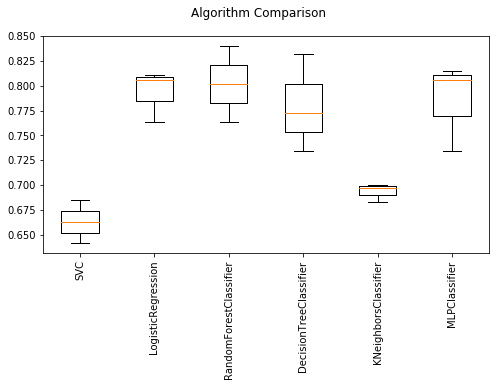

In [50]:
    
some_variables = ["Age", "SibSp", "Fare", "Parch", "Pclass", "Embarked_Q", "Embarked_S", "Sex_male"]

evaluation_model(X_train[some_variables], 
                 y_train, 
                 models = list(zip(names, models)), 
                 num_folds = 3, 
                 seed = random_state,
                 scoring="accuracy")

SVC: Precision mean 0.662890 Precison std (0.017771)
LogisticRegression: Precision mean 0.807574 Precison std (0.013188)
RandomForestClassifier: Precision mean 0.806126 Precison std (0.031274)
DecisionTreeClassifier: Precision mean 0.772388 Precison std (0.043354)
KNeighborsClassifier: Precision mean 0.692409 Precison std (0.009329)
MLPClassifier: Precision mean 0.786465 Precison std (0.035616)


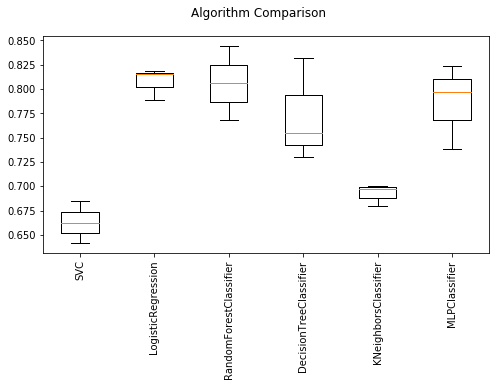

In [51]:

some_variables = ["Age", "SibSp", "Fare", "Parch", "Embarked_Q", "Embarked_S", "Sex_male", "Pclass_2", "Pclass_3"]

evaluation_model(X_train[some_variables], 
                 y_train, 
                 models = list(zip(names, models)), 
                 num_folds = 3, 
                 seed = random_state,
                 scoring="accuracy")

LogisticRegression(), RandomForestClassifier() et MLPClassifier() donnent de meilleurs résultats

In [52]:
## feature importances

def featureImportances(X_train, y_train, features, estimator = RandomForestClassifier(n_estimators=100)):
    
    estimator.fit(X_train[features], y_train)

    # Calculate the feature ranking
    importances = estimator.feature_importances_ 
    std = np.std([tree.feature_importances_ for tree in estimator.estimators_],
                 axis=0)

    nb_feat = len(features)

    indices = np.argsort(importances)[::-1][:nb_feat]

    for f in range(nb_feat):
        print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

    #Plot the feature importances of the forest
    indices=indices[:nb_feat]
    plt.figure(figsize=(8,4))
    plt.title("Top Feature importances")
    plt.bar(range(nb_feat), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(nb_feat), np.array(features)[indices.tolist()], rotation=90)

    plt.xlim([-1, nb_feat])
    plt.show()

    #Mean Feature Importance
    print ("Mean Feature Importance %.6f" %np.mean(importances))


1. Fare (0.270707)
2. Age (0.267134)
3. Sex_male (0.250637)
4. Pclass (0.090421)
5. SibSp (0.047314)
6. Parch (0.037947)
7. Embarked_S (0.024730)
8. Embarked_Q (0.011110)


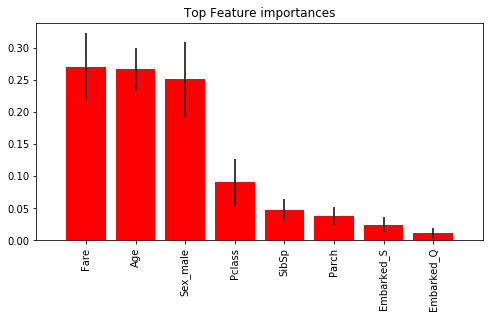

Mean Feature Importance 0.125000


In [53]:
    
some_variables = ["Age", "SibSp", "Fare", "Parch", "Pclass", "Embarked_Q", "Embarked_S", "Sex_male"]
# some_variables = ["Age", "SibSp", "Fare", "Parch", "Embarked_Q", "Embarked_S", "Sex_male", "Pclass_2", "Pclass_3"]
    
featureImportances(X_train[some_variables], y_train, some_variables)

1. Fare (0.267255)
2. Sex_male (0.262387)
3. Age (0.261355)
4. Pclass_3 (0.073814)
5. SibSp (0.043720)
6. Parch (0.035862)
7. Embarked_S (0.023876)
8. Pclass_2 (0.018622)
9. Embarked_Q (0.013110)


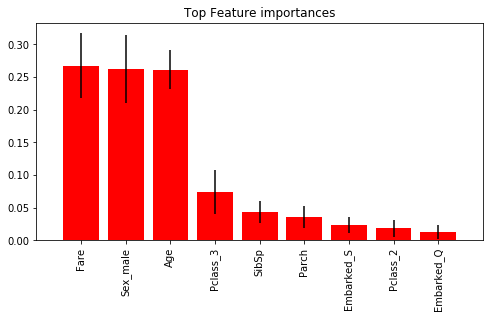

Mean Feature Importance 0.111111


In [54]:
    
some_variables = ["Age", "SibSp", "Fare", "Parch", "Embarked_Q", "Embarked_S", "Sex_male", "Pclass_2", "Pclass_3"]
    
featureImportances(X_train[some_variables], y_train, some_variables)

###### Création du Pipeline de prédiction

Notre Pipeline aura 2 étages:

- Prétraitement (Scaling, etc...)
- Prédiction



In [55]:
# Cette classe va nous permettre de sélectionner des features
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import PolynomialFeatures

class FeatureSelector(BaseEstimator, TransformerMixin):
   
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]
    
# # Cette classe va nous permettre de créer des combinaisons de features
# class PolynomialeSelector(BaseEstimator, TransformerMixin):
   
#     def __init__(self, key, degree=2, interaction_only=False, include_bias=True):
#         self.key = key
#         self.degree = degree
#         self.interaction_only = interaction_only
#         self.include_bias = include_bias

#     def fit(self, x, y=None):
#         return self

#     def transform(self, data):
#         data = data[self.key]
#         poly = PolynomialFeatures(self.degree, self.interaction_only, self.include_bias)
#         data_dict_poly = poly.fit_transform(data)
#         data_dict_poly = pd.DataFrame(data_dict_poly, columns=poly.get_feature_names(data.columns))
#         poly_features = list(set(data_dict_poly.columns) -set(data.columns))
#         return data_dict_poly[poly_features]

In [56]:
key_selector = ["Age", "Fare", "Pclass"]

featureSelector = FeatureSelector(key=key_selector)

X_train_transformed = featureSelector.transform(X_train)
X_train_transformed.head()

,Age,Fare,Pclass
306,29.699118,110.8833,1
313,28.000000,7.8958,3
717,27.000000,10.5000,2
274,29.699118,7.7500,3
720,6.000000,33.0000,2


In [57]:
X_train.head()

,Fare,Embarked,Age,SibSp,Parch,Sex,Pclass,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3
306,110.8833,C,29.699118,0,0,female,1,0,0,0,0,0
313,7.8958,S,28.000000,0,0,male,3,0,1,1,0,1
717,10.5000,S,27.000000,0,0,female,2,0,1,0,1,0
274,7.7500,Q,29.699118,0,0,female,3,1,0,0,0,1
720,33.0000,S,6.000000,0,1,female,2,0,1,0,1,0


In [58]:
# key_poly = ["Age", "Fare"]

# polynomialeSelector = PolynomialeSelector(key=key_poly, degree=2, interaction_only=False, include_bias=True)

# X_train_transformed = polynomialeSelector.transform(X_train)
# X_train_transformed.head()

In [59]:
# test de la combinaison entre FeatureSelector et PolynomialeSelector

fu = FeatureUnion(
        transformer_list=[

#             basic features
            ('basic_features', Pipeline([
                ('features', FeatureSelector(key=key_selector)),
            ])),

#             others features
#             ('polynomial_features', Pipeline([
#                 ('features', PolynomialeSelector(key=key_poly, degree=2, interaction_only=False, include_bias=True)),
#             ])),
        ],

        # poids des composants du FeatureUnion
        transformer_weights={
            'basic_features': 1.0, # 1.0
#             'polynomial_features': 1.0, #  0.83
        },
    )
X_train_transformed = fu.fit_transform(X_train)
pd.DataFrame(X_train_transformed).head()

,0,1,2
0,29.699118,110.8833,1.0
1,28.000000,7.8958,3.0
2,27.000000,10.5000,2.0
3,29.699118,7.7500,3.0
4,6.000000,33.0000,2.0


###### LogisticRegression hyper-parameters Optim

In [60]:

pipeline = Pipeline([

    # Utilisation de FeatureUnion afin de combiner les tickers
    ('union', FeatureUnion(
        transformer_list=[
            
            ('basic_features', Pipeline([
                ('features', FeatureSelector(key=["Age", "Fare", "Pclass", "Sex_male"])),
            ])),

        ],

        # poids des composants du FeatureUnion
        transformer_weights={
            'basic_features': 1.0, # 1.0
        },
    )),
    
    # etape de prétraitement
    ('preProcessingML',StandardScaler(with_mean=True)) , # FunctionTransformer()

    ('Classifier', LogisticRegression(penalty='l2', 
                                      tol=0.0001, 
                                      C=1.0, 
                                      fit_intercept=True, 
                                      random_state=random_state,
                                      solver='lbfgs',
                                      max_iter=100, 
                                      n_jobs=-1, 
#                                       l1_ratio=None
                                     )
    ),
])
##########################################################################################################""

param_grid_1 = dict(
#
                       union__basic_features__features__key=[
                                                                ["Age", "Fare", "Pclass", "Sex_male"],
                                                                ["Age", "Fare", "Sex_male", "Pclass_2", "Pclass_3"],
                                                                ["Age", "SibSp", "Fare", "Parch", "Pclass", "Embarked_Q", "Embarked_S", "Sex_male"],
                                                                ["Age", "SibSp", "Fare", "Parch", "Embarked_Q", "Embarked_S", "Sex_male", "Pclass_2", "Pclass_3"]
                                                               ],
    
    
                       preProcessingML = [
                                          None,
                                         Normalizer(norm='l2'), 
                                         Normalizer(norm='l1'),
                                         MaxAbsScaler(),
                                         MinMaxScaler(),
                                         RobustScaler(),
                                         StandardScaler(with_mean=True)
                                         ],
    
                   Classifier__penalty = ['elasticnet'], # 
                   Classifier__solver = ['saga'], #  
                   Classifier__tol = [0.001, 0.0001, 0.00001], #  
                   Classifier__C = [0.7, 1.0, 1.5], #  
#                    Classifier__l1_ratio = [0, 0.3, 0.5, 0.7, 1], #
                )



param_grid_2 = dict(
#
                       union__basic_features__features__key=[
                                                                ["Age", "Fare", "Pclass", "Sex_male"],
                                                                ["Age", "Fare", "Sex_male" , "Pclass_2", "Pclass_3"],
                                                                ["Age", "SibSp", "Fare", "Parch", "Pclass", "Embarked_Q", "Embarked_S", "Sex_male"],
                                                                ["Age", "SibSp", "Fare", "Parch", "Embarked_Q", "Embarked_S", "Sex_male", "Pclass_2", "Pclass_3"]
                                                               ],
    
                       preProcessingML = [
                                          None,
                                         Normalizer(norm='l2'), 
                                         Normalizer(norm='l1'),
                                         MaxAbsScaler(),
                                         MinMaxScaler(),
                                         RobustScaler(),
                                         StandardScaler(with_mean=True)
                                         ],
    
                   Classifier__penalty = ['l2'], # 
                   Classifier__solver = ['lbfgs'], #  
                   Classifier__tol = [0.001, 0.0001, 0.00001], #  
                   Classifier__C = [0.7, 1.0, 1.5, 5, 10], 
                )

In [62]:
# !pip install -U scikit-learn
import sklearn
sklearn.__version__

'0.22.1'

In [61]:
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)

# grid_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=200, verbose=1, scoring =rmsle_scorer, n_jobs=-1, cv=cv, random_state = random_state)
grid_search = GridSearchCV(pipeline, 
                           param_grid=[param_grid_1, param_grid_2], 
                           verbose=1, 
                           scoring ="accuracy", 
                           n_jobs=-1, 
                           cv=cv)

grid_search.fit(X_train, y_train)
lr_best_estimator = grid_search.best_estimator_

Fitting 5 folds for each of 672 candidates, totalling 3360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1696 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 1946 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 2296 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 2746 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 3296 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 3360 out of 3360 | elapsed:   37.6s finished


In [ ]:
lr_best_estimator.named_steps['union']

In [ ]:
lr_best_estimator.named_steps['preProcessingML']

In [ ]:
lr_best_estimator.named_steps['Classifier']

In [ ]:
print('Train error =', round(accuracy_score(y_train, lr_best_estimator.predict(X_train)), 4))
print('Validation error  =', round(accuracy_score(y_val, lr_best_estimator.predict(X_val)), 4))

In [ ]:
# # # lr_best_estimator
# Train error = 0.8062
# Validation error  = 0.8101

###### KNeighborsClassifier hyper-parameters Optim

In [ ]:

pipeline = Pipeline([

    # Utilisation de FeatureUnion afin de combiner les tickers
    ('union', FeatureUnion(
        transformer_list=[
            
            ('basic_features', Pipeline([
                ('features', FeatureSelector(key=["Age", "Fare", "Pclass", "Sex_male"])),
            ])),
        ],


        # poids des composants du FeatureUnion
        transformer_weights={
            'basic_features': 1.0, # 1.0
        },
    )),
    
    # etape de prétraitement
    ('preProcessingML',StandardScaler(with_mean=True)) , # FunctionTransformer()

    ('Classifier', KNeighborsClassifier(n_neighbors=5, 
                                        weights='uniform', 
                                        p=2,
                                        n_jobs=-1)
    ),
])

##########################################################################################################""

param_grid_1 = dict(
#
                       union__basic_features__features__key=[
                                                                ["Age", "Fare", "Pclass", "Sex_male"],
                                                                ["Age", "Fare", "Sex_male" , "Pclass_2", "Pclass_3"],
                                                                ["Age", "SibSp", "Fare", "Parch", "Pclass", "Embarked_Q", "Embarked_S", "Sex_male"],
                                                                ["Age", "SibSp", "Fare", "Parch", "Embarked_Q", "Embarked_S", "Sex_male", "Pclass_2", "Pclass_3"]
                                                               ],

    
    
                       preProcessingML = [
                                          None,
                                         Normalizer(norm='l2'), 
                                         Normalizer(norm='l1'),
                                         MaxAbsScaler(),
                                         MinMaxScaler(),
                                         RobustScaler(),
                                         StandardScaler(with_mean=True)
                                         ],
    
                   Classifier__n_neighbors = [3, 4, 5, 6, 7, 8, 9, 10, 11], # 
                   Classifier__weights = ['uniform', 'distance'], #  
                   Classifier__p = [1, 2], #  
                )


In [ ]:
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)

# grid_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=200, verbose=1, scoring =rmsle_scorer, n_jobs=-1, cv=cv, random_state = random_state)

grid_search = GridSearchCV(pipeline, 
                           param_grid=[param_grid_1], 
                           verbose=1, 
                           scoring ="accuracy", 
                           n_jobs=-1, 
                           cv=cv)

grid_search.fit(X_train, y_train)
knn_best_estimator = grid_search.best_estimator_

In [ ]:
knn_best_estimator.named_steps['union']

In [ ]:
knn_best_estimator.named_steps['preProcessingML']

In [ ]:
knn_best_estimator.named_steps['Classifier']

In [ ]:
print('Train error =', round(accuracy_score(y_train, knn_best_estimator.predict(X_train)), 4))
print('Validation error  =', round(accuracy_score(y_val, knn_best_estimator.predict(X_val)), 4))

In [ ]:
# # # lr_best_estimator
# Train error = 0.8062
# Validation error  = 0.8101


# # knn_best_estimator
# Train error = 0.8497
# Validation error  = 0.8101

###### SVC hyper-parameters Optim

In [ ]:

pipeline = Pipeline([

    # Utilisation de FeatureUnion afin de combiner les tickers
    ('union', FeatureUnion(
        transformer_list=[
            
            ('basic_features', Pipeline([
                ('features', FeatureSelector(key=features)),
            ])),

        ],


        # poids des composants du FeatureUnion
        transformer_weights={
            'basic_features': 1.0, # 1.0
        },
    )),
    
    # etape de prétraitement
    ('preProcessingML', None) , # FunctionTransformer()

    ('Classifier', SVC(C=1.0, 
                       kernel='rbf', 
                       degree=3, 
                       random_state=random_state)
    ),
])

##########################################################################################################""

param_grid_1 = dict(
#
                       union__basic_features__features__key=[
                                                                ["Age", "Fare", "Pclass", "Sex_male"],
                                                                ["Age", "Fare", "Sex_male" , "Pclass_2", "Pclass_3"],
                                                                ["Age", "SibSp", "Fare", "Parch", "Pclass", "Embarked_Q", "Embarked_S", "Sex_male"],
                                                                ["Age", "SibSp", "Fare", "Parch", "Embarked_Q", "Embarked_S", "Sex_male", "Pclass_2", "Pclass_3"]
                                                               ],

    
    
                       preProcessingML = [
                                          None,
                                         Normalizer(norm='l2'), 
                                         Normalizer(norm='l1'),
                                         MaxAbsScaler(),
                                         MinMaxScaler(),
                                         RobustScaler(),
                                         StandardScaler(with_mean=True)
                                         ],
    
                   Classifier__C = [0.5, 1, 5, 10], # 
                   Classifier__kernel = ['sigmoid', 'rbf'], #  
                )


# param_grid_2 = dict(
# #
#                        union__basic_features__features__key=[
#                                                                 ["Age", "Fare", "Pclass", "Sex_male"],
#                                                                 ["Age", "Fare", "Sex_male" , "Pclass_2", "Pclass_3"],
#                                                                 ["Age", "SibSp", "Fare", "Parch", "Pclass", "Embarked_Q", "Embarked_S", "Sex_male"],
#                                                                 ["Age", "SibSp", "Fare", "Parch", "Embarked_Q", "Embarked_S", "Sex_male", "Pclass_2", "Pclass_3"]
#                                                                ],
    
    
#                        preProcessingML = [
#                                           None,
#                                          Normalizer(norm='l2'), 
#                                          Normalizer(norm='l1'),
#                                          MaxAbsScaler(),
#                                          MinMaxScaler(),
#                                          RobustScaler(),
#                                          StandardScaler(with_mean=True)
#                                          ],
    
#                    Classifier__C = [0.5, 1, 5, 10], # 
#                    Classifier__kernel = ['poly'], #  
#                    Classifier__degree = [2], #  
#                 )

In [ ]:
n_splits = 5

cv = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)

# grid_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=200, verbose=1, scoring =rmsle_scorer, n_jobs=-1, cv=cv, random_state = random_state)
grid_search = GridSearchCV(pipeline, 
                           param_grid=[param_grid_1], 
                           verbose=1, 
                           scoring ="accuracy", 
                           n_jobs=-1, 
                           cv=cv)

grid_search.fit(X_train, y_train)
svc_best_estimator = grid_search.best_estimator_

In [ ]:
svc_best_estimator.named_steps['union']

In [ ]:
svc_best_estimator.named_steps['preProcessingML']

In [ ]:
svc_best_estimator.named_steps['Classifier']

In [ ]:
print('Train error =', round(accuracy_score(y_train, svc_best_estimator.predict(X_train)), 4))
print('Validation error  =', round(accuracy_score(y_val, svc_best_estimator.predict(X_val)), 4))

In [ ]:
# # # lr_best_estimator
# Train error = 0.8062
# Validation error  = 0.8101


# # knn_best_estimator
# Train error = 0.8497
# Validation error  = 0.8101

# svc_best_estimator
# Train error = 0.8427
# Validation error  = 0.8101

###### DecisionTreeClassifier hyper-parameters Optim

In [ ]:

pipeline = Pipeline([

    # Utilisation de FeatureUnion afin de combiner les tickers
    ('union', FeatureUnion(
        transformer_list=[
            
            ('basic_features', Pipeline([
                ('features', FeatureSelector(key=features)),
            ])),
        ],


        # poids des composants du FeatureUnion
        transformer_weights={
            'basic_features': 1.0, # 1.0
        },
    )),
    
    # etape de prétraitement
    ('preProcessingML',StandardScaler(with_mean=True)) , # FunctionTransformer()

    ('Classifier', DecisionTreeClassifier(criterion='gini', 
                                          max_depth=None, 
                                          min_samples_split=2)
    ),
])

##########################################################################################################""

param_grid_1 = dict(
#
                       union__basic_features__features__key=[
                                                                ["Age", "Fare", "Pclass", "Sex_male"],
                                                                ["Age", "Fare", "Sex_male" , "Pclass_2", "Pclass_3"],
                                                                ["Age", "SibSp", "Fare", "Parch", "Pclass", "Embarked_Q", "Embarked_S", "Sex_male"],
                                                                ["Age", "SibSp", "Fare", "Parch", "Embarked_Q", "Embarked_S", "Sex_male", "Pclass_2", "Pclass_3"]
                                                               ],
    
    
                       preProcessingML = [
                                          None,
                                         Normalizer(norm='l2'), 
                                         Normalizer(norm='l1'),
                                         MaxAbsScaler(),
                                         MinMaxScaler(),
                                         RobustScaler(),
                                         StandardScaler(with_mean=True)
                                         ],
    
                   Classifier__criterion = ["gini", "entropy"], # 
                   Classifier__max_depth = [None, 3, 4, 5], #
                   Classifier__min_samples_split = [2, 5, 7], #  
                )

In [ ]:
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)

# grid_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=200, verbose=1, scoring =rmsle_scorer, n_jobs=-1, cv=cv, random_state = random_state)
grid_search = GridSearchCV(pipeline, 
                           param_grid=[param_grid_1], 
                           verbose=1, 
                           scoring ="accuracy", 
                           n_jobs=-1, 
                           cv=cv)

grid_search.fit(X_train, y_train)
dt_best_estimator = grid_search.best_estimator_

In [ ]:
dt_best_estimator.named_steps['union']

In [ ]:
dt_best_estimator.named_steps['preProcessingML']

In [ ]:
dt_best_estimator.named_steps['Classifier']

In [ ]:
print('Train error =', round(accuracy_score(y_train, dt_best_estimator.predict(X_train)), 4))
print('Validation error  =', round(accuracy_score(y_val, dt_best_estimator.predict(X_val)), 4))

In [ ]:
# # # lr_best_estimator
# Train error = 0.8062
# Validation error  = 0.8101


# # knn_best_estimator
# Train error = 0.8497
# Validation error  = 0.8101

# svc_best_estimator
# Train error = 0.8427
# Validation error  = 0.8101

# dt_best_estimator
# Train error = 0.8343
# Validation error  = 0.8156

###### MLPClassifier hyper-parameters Optim

In [ ]:

pipeline = Pipeline([

    # Utilisation de FeatureUnion afin de combiner les tickers
    ('union', FeatureUnion(
        transformer_list=[
            
            ('basic_features', Pipeline([
                ('features', FeatureSelector(key=features)),
            ])),

        ],


        # poids des composants du FeatureUnion
        transformer_weights={
            'basic_features': 1.0, # 1.0
        },
    )),
    
    # etape de prétraitement
    ('preProcessingML',StandardScaler(with_mean=True)) , # FunctionTransformer()

    ('Classifier', MLPClassifier(hidden_layer_sizes=(100, ), 
                                 activation='relu', 
                                 solver='adam', 
                                 alpha=0.0001,
                                 batch_size='auto', 
                                 learning_rate='constant', 
                                 learning_rate_init=0.001, 
                                 max_iter=400, 
                                 random_state=random_state)
    ),
])

##########################################################################################################""

param_grid_1 = dict(
#
                       union__basic_features__features__key=[
                                                                ["Age", "Fare", "Pclass", "Sex_male"],
                                                                ["Age", "Fare", "Sex_male" , "Pclass_2", "Pclass_3"],
                                                                ["Age", "SibSp", "Fare", "Parch", "Pclass", "Embarked_Q", "Embarked_S", "Sex_male"],
                                                                ["Age", "SibSp", "Fare", "Parch", "Embarked_Q", "Embarked_S", "Sex_male", "Pclass_2", "Pclass_3"]
                                                               ],
    
    
                       preProcessingML = [
                                          None,
                                         Normalizer(norm='l2'), 
                                         Normalizer(norm='l1'),
                                         MaxAbsScaler(),
                                         MinMaxScaler(),
                                         RobustScaler(),
                                         StandardScaler(with_mean=True)
                                         ],
    
                   Classifier__hidden_layer_sizes = [(100, ), (100, 50), (100, 25), (100, 12)], # 
#                    Classifier__alpha = [0.0001], #   
#                    Classifier__batch_size = ["auto", 32, 64, 128], #   
#                    Classifier__learning_rate = ['constant', 'invscaling', 'adaptive'], #   
#                    Classifier__learning_rate_init = [0.0001, 0.001, 0.01], #  
                )

In [ ]:
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)

# grid_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=200, verbose=1, scoring =rmsle_scorer, n_jobs=-1, cv=cv, random_state = random_state)
grid_search = GridSearchCV(pipeline, 
                           param_grid=[param_grid_1], 
                           verbose=1, 
                           scoring ="accuracy", 
                           n_jobs=-1, 
                           cv=cv)

grid_search.fit(X_train, y_train)
mlp_best_estimator = grid_search.best_estimator_

In [ ]:
mlp_best_estimator.named_steps['union']

In [ ]:
mlp_best_estimator.named_steps['preProcessingML']

In [ ]:
mlp_best_estimator.named_steps['Classifier']

In [ ]:
print('Train error =', round(accuracy_score(y_train, mlp_best_estimator.predict(X_train)), 4))
print('Validation error  =', round(accuracy_score(y_val, mlp_best_estimator.predict(X_val)), 4))

###### Résumé des performances

<table>
    <thead>
        <tr>
            <th>Algo</th>
            <th align="center">Train</th>
            <th align="right">Validation</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>DecisionTreeClassifier</td>
            <td align="center">0.8343</td>
            <td align="right">0.8156</td>
        </tr>
        <tr>
            <td>SVC</td>
            <td align="center">0.8427</td>
            <td align="right">0.8101</td>
        </tr>
        <tr>
            <td>MLPClassifier</td>
            <td align="center">0.8357</td>
            <td align="right">0.8045</td>
        </tr>
        <tr>
            <td>KNeighborsClassifier</td>
            <td align="center">0.8497</td>
            <td align="right">0.8101</td>
        </tr>
        <tr>
            <td>LogisticRegression</td>
            <td align="center">0.8062</td>
            <td align="right">0.8101</td>
        </tr>
    </tbody>
</table>


### 3. Analyse  obtained results in the report and provide a solution to improve the results.

Afin d'améliorer les résultats, nous allons:

- (1) ajouter des Features à notre pipeline; on aura donc:

    - Features engineering
            - Interquartile Range (IQR) features
            - Binary Feeatures
    - Prétraitement (Scaling, etc...)
    - Prédiction

- (2) Ensuite nous allonc combiner les meilleurs modèles entre eux

Nous allons créer de nouvelles variables liées aux deux variables les plus importantes: Fare et Age

In [ ]:
data_train[['Fare']].describe()

In [ ]:
data_train['Fare<Q1'] =  (data_train['Fare'] < 7.910400).astype(int)
data_test['Fare<Q1'] =  (data_test['Fare'] < 7.910400).astype(int)

data_train['Fare>Q2'] =  (data_train['Fare'] > 31).astype(int)
data_test['Fare>Q2'] =  (data_test['Fare'] > 31).astype(int)

data_train['Fare_between_Q1_Q2'] =  ((data_train['Fare'] >= 7.910400) & (data_train['Fare'] <= 31)).astype(int)
data_test['Fare_between_Q1_Q2'] =  ((data_test['Fare'] >= 7.910400) & (data_test['Fare'] <= 31)).astype(int)

data_train['Fare>median'] =  (data_train['Fare'] > 14.45).astype(int)
data_test['Fare>median'] =  (data_test['Fare'] > 14.45).astype(int)

In [ ]:
data_train.sample(5)

In [ ]:
data_train[['Age']].describe()

In [ ]:
data_train['Age<15'] =  (data_train['Age'] < 15).astype(int)
data_test['Age<15'] =  (data_test['Age'] < 15).astype(int)


data_train['Age_between_15_30'] =  ((data_train['Age'] >= 15) & (data_train['Age'] <= 30)).astype(int)
data_test['Age_between_15_30'] =  ((data_test['Age'] >= 15) & (data_test['Age'] <= 30)).astype(int)

data_train['Age_between_30_45'] =  ((data_train['Age'] >= 30) & (data_train['Age'] <= 45)).astype(int)
data_test['Age_between_30_45'] =  ((data_test['Age'] >= 30) & (data_test['Age'] <= 45)).astype(int)


data_train['Age_between_45_60'] =  ((data_train['Age'] >= 45) & (data_train['Age'] <= 60)).astype(int)
data_test['Age_between_45_60'] =  ((data_test['Age'] >= 45) & (data_test['Age'] <= 60)).astype(int)

data_train['Age>60'] =  (data_train['Age'] > 60).astype(int)
data_test['Age>60'] =  (data_test['Age'] > 60).astype(int)


In [ ]:
data_train.sample(5)

###### Redéfinissons X_train, X_val, y_train, y_val

In [ ]:
features = list(data_test.columns)
target = 'Survived'

X_train, X_val, y_train, y_val = train_test_split(data_train[features], 
                                                    data_train[target], 
                                                    test_size=0.2, 
                                                    random_state=random_state,
                                                    stratify = data_train[target] 
                                                   )

features_1 = ["Age", "SibSp", "Fare", "Parch", "Pclass", "Embarked_Q", "Embarked_S", "Sex_male"]+features[-9:]
features_2 = ["Age", "SibSp", "Fare", "Parch", "Embarked_Q", "Embarked_S", "Sex_male", "Pclass_2", "Pclass_3"]+features[-9:]


In [ ]:
features_1

In [ ]:
features_2

###### LogisticRegression hyper-parameters Optim

In [ ]:

pipeline = Pipeline([

    # Utilisation de FeatureUnion afin de combiner les tickers
    ('union', FeatureUnion(
        transformer_list=[
            
            ('basic_features', Pipeline([
                ('features', FeatureSelector(key=["Age", "Fare", "Pclass", "Sex_male"])),
            ])),

        ],

        # poids des composants du FeatureUnion
        transformer_weights={
            'basic_features': 1.0, # 1.0
        },
    )),
    
    # etape de prétraitement
    ('preProcessingML',StandardScaler(with_mean=True)) , # FunctionTransformer()

    ('Classifier', LogisticRegression(penalty='l2', 
                                      tol=0.0001, 
                                      C=1.0, 
                                      fit_intercept=True, 
                                      random_state=random_state,
                                      solver='lbfgs',
                                      max_iter=100, 
                                      n_jobs=-1, 
#                                       l1_ratio=None
                                     )
    ),
])
##########################################################################################################""

param_grid_1 = dict(
#
                       union__basic_features__features__key=[
                                                                features_1,
                                                                features_2,
                                                                ["Age", "Fare", "Pclass", "Sex_male"],
                                                                ["Age", "Fare", "Sex_male", "Pclass_2", "Pclass_3"],
                                                                ["Age", "SibSp", "Fare", "Parch", "Pclass", "Embarked_Q", "Embarked_S", "Sex_male"],
                                                                ["Age", "SibSp", "Fare", "Parch", "Embarked_Q", "Embarked_S", "Sex_male", "Pclass_2", "Pclass_3"]
                                                               ],
    
    
                       preProcessingML = [
                                          None,
                                         Normalizer(norm='l2'), 
                                         Normalizer(norm='l1'),
                                         MaxAbsScaler(),
                                         MinMaxScaler(),
                                         RobustScaler(),
                                         StandardScaler(with_mean=True)
                                         ],
    
                   Classifier__penalty = ['elasticnet'], # 
                   Classifier__solver = ['saga'], #  
                   Classifier__tol = [0.001, 0.0001, 0.00001], #  
                   Classifier__C = [0.7, 1.0, 1.5], #  
#                    Classifier__l1_ratio = [0, 0.3, 0.5, 0.7, 1], #
                )



param_grid_2 = dict(
#
                       union__basic_features__features__key=[
                                                                features_1,
                                                                features_2,
                                                                ["Age", "Fare", "Pclass", "Sex_male"],
                                                                ["Age", "Fare", "Sex_male", "Pclass_2", "Pclass_3"],
                                                                ["Age", "SibSp", "Fare", "Parch", "Pclass", "Embarked_Q", "Embarked_S", "Sex_male"],
                                                                ["Age", "SibSp", "Fare", "Parch", "Embarked_Q", "Embarked_S", "Sex_male", "Pclass_2", "Pclass_3"]
                                                               ],
    
                       preProcessingML = [
                                          None,
                                         Normalizer(norm='l2'), 
                                         Normalizer(norm='l1'),
                                         MaxAbsScaler(),
                                         MinMaxScaler(),
                                         RobustScaler(),
                                         StandardScaler(with_mean=True)
                                         ],
    
                   Classifier__penalty = ['l2'], # 
                   Classifier__solver = ['lbfgs'], #  
                   Classifier__tol = [0.001, 0.0001, 0.00001], #  
                   Classifier__C = [0.7, 1.0, 1.5, 5, 10], 
                )

In [ ]:
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)

# grid_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=200, verbose=1, scoring =rmsle_scorer, n_jobs=-1, cv=cv, random_state = random_state)
grid_search = GridSearchCV(pipeline, 
                           param_grid=[param_grid_1, param_grid_2], 
                           verbose=1, 
                           scoring ="accuracy", 
                           n_jobs=-1, 
                           cv=cv)

grid_search.fit(X_train, y_train)
lr_best_estimator = grid_search.best_estimator_

In [ ]:
print('Train error =', round(accuracy_score(y_train, lr_best_estimator.predict(X_train)), 4))
print('Validation error  =', round(accuracy_score(y_val, lr_best_estimator.predict(X_val)), 4))

###### KNeighborsClassifier hyper-parameters Optim

In [ ]:

pipeline = Pipeline([

    # Utilisation de FeatureUnion afin de combiner les tickers
    ('union', FeatureUnion(
        transformer_list=[
            
            ('basic_features', Pipeline([
                ('features', FeatureSelector(key=["Age", "Fare", "Pclass", "Sex_male"])),
            ])),
        ],


        # poids des composants du FeatureUnion
        transformer_weights={
            'basic_features': 1.0, # 1.0
        },
    )),
    
    # etape de prétraitement
    ('preProcessingML',StandardScaler(with_mean=True)) , # FunctionTransformer()

    ('Classifier', KNeighborsClassifier(n_neighbors=5, 
                                        weights='uniform', 
                                        p=2,
                                        n_jobs=-1)
    ),
])

##########################################################################################################""

param_grid_1 = dict(
#
                       union__basic_features__features__key=[
                                                                features_1,
                                                                features_2,
                                                                ["Age", "Fare", "Pclass", "Sex_male"],
                                                                ["Age", "Fare", "Sex_male", "Pclass_2", "Pclass_3"],
                                                                ["Age", "SibSp", "Fare", "Parch", "Pclass", "Embarked_Q", "Embarked_S", "Sex_male"],
                                                                ["Age", "SibSp", "Fare", "Parch", "Embarked_Q", "Embarked_S", "Sex_male", "Pclass_2", "Pclass_3"]
                                                               ],

    
    
                       preProcessingML = [
                                          None,
                                         Normalizer(norm='l2'), 
                                         Normalizer(norm='l1'),
                                         MaxAbsScaler(),
                                         MinMaxScaler(),
                                         RobustScaler(),
                                         StandardScaler(with_mean=True)
                                         ],
    
                   Classifier__n_neighbors = [3, 4, 5, 6, 7, 8, 9, 10, 11], # 
                   Classifier__weights = ['uniform', 'distance'], #  
                   Classifier__p = [1, 2], #  
                )


In [ ]:
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)

# grid_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=200, verbose=1, scoring =rmsle_scorer, n_jobs=-1, cv=cv, random_state = random_state)
grid_search = GridSearchCV(pipeline, 
                           param_grid=[param_grid_1], 
                           verbose=1, 
                           scoring ="accuracy", 
                           n_jobs=-1, 
                           cv=cv)

grid_search.fit(X_train, y_train)
knn_best_estimator = grid_search.best_estimator_

In [ ]:
print('Train error =', round(accuracy_score(y_train, knn_best_estimator.predict(X_train)), 4))
print('Validation error  =', round(accuracy_score(y_val, knn_best_estimator.predict(X_val)), 4))

###### SVC hyper-parameters Optim

In [ ]:

pipeline = Pipeline([

    # Utilisation de FeatureUnion afin de combiner les tickers
    ('union', FeatureUnion(
        transformer_list=[
            
            ('basic_features', Pipeline([
                ('features', FeatureSelector(key=features)),
            ])),

        ],


        # poids des composants du FeatureUnion
        transformer_weights={
            'basic_features': 1.0, # 1.0
        },
    )),
    
    # etape de prétraitement
    ('preProcessingML', None) , # FunctionTransformer()

    ('Classifier', SVC(C=1.0, 
                       kernel='rbf', 
                       degree=3, 
                       probability=True,
                       random_state=random_state)
    ),
])

##########################################################################################################""

param_grid_1 = dict(
#
                       union__basic_features__features__key=[
                                                                features_1,
                                                                features_2,
                                                                ["Age", "Fare", "Pclass", "Sex_male"],
                                                                ["Age", "Fare", "Sex_male", "Pclass_2", "Pclass_3"],
                                                                ["Age", "SibSp", "Fare", "Parch", "Pclass", "Embarked_Q", "Embarked_S", "Sex_male"],
                                                                ["Age", "SibSp", "Fare", "Parch", "Embarked_Q", "Embarked_S", "Sex_male", "Pclass_2", "Pclass_3"]
                                                               ],

    
    
                       preProcessingML = [
                                          None,
                                         Normalizer(norm='l2'), 
                                         Normalizer(norm='l1'),
                                         MaxAbsScaler(),
                                         MinMaxScaler(),
                                         RobustScaler(),
                                         StandardScaler(with_mean=True)
                                         ],
    
                   Classifier__C = [0.5, 1, 5, 10], # 
                   Classifier__kernel = ['sigmoid', 'rbf'], #  
                )


# param_grid_2 = dict(
# #
#                        union__basic_features__features__key=[
#                                                                 features_1,
#                                                                 features_2,
#                                                                 ["Age", "Fare", "Pclass", "Sex_male"],
#                                                                 ["Age", "Fare", "Sex_male", "Pclass_2", "Pclass_3"],
#                                                                 ["Age", "SibSp", "Fare", "Parch", "Pclass", "Embarked_Q", "Embarked_S", "Sex_male"],
#                                                                 ["Age", "SibSp", "Fare", "Parch", "Embarked_Q", "Embarked_S", "Sex_male", "Pclass_2", "Pclass_3"]
#                                                                ],
    
    
#                        preProcessingML = [
#                                           None,
#                                          Normalizer(norm='l2'), 
#                                          Normalizer(norm='l1'),
#                                          MaxAbsScaler(),
#                                          MinMaxScaler(),
#                                          RobustScaler(),
#                                          StandardScaler(with_mean=True)
#                                          ],
    
#                    Classifier__C = [0.5, 1, 5, 10], # 
#                    Classifier__kernel = ['poly'], #  
#                    Classifier__degree = [2], #  
#                 )

In [ ]:
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)

# grid_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=200, verbose=1, scoring =rmsle_scorer, n_jobs=-1, cv=cv, random_state = random_state)
grid_search = GridSearchCV(pipeline, 
                           param_grid=[param_grid_1], 
                           verbose=1, 
                           scoring ="accuracy", 
                           n_jobs=-1, 
                           cv=cv)

grid_search.fit(X_train, y_train)
svc_best_estimator = grid_search.best_estimator_



In [ ]:
print('Train error =', round(accuracy_score(y_train, svc_best_estimator.predict(X_train)), 4))
print('Validation error  =', round(accuracy_score(y_val, svc_best_estimator.predict(X_val)), 4))

###### DecisionTreeClassifier hyper-parameters Optim

In [ ]:

pipeline = Pipeline([

    # Utilisation de FeatureUnion afin de combiner les tickers
    ('union', FeatureUnion(
        transformer_list=[
            
            ('basic_features', Pipeline([
                ('features', FeatureSelector(key=features)),
            ])),
        ],


        # poids des composants du FeatureUnion
        transformer_weights={
            'basic_features': 1.0, # 1.0
        },
    )),
    
    # etape de prétraitement
    ('preProcessingML',StandardScaler(with_mean=True)) , # FunctionTransformer()

    ('Classifier', DecisionTreeClassifier(criterion='gini', 
                                          max_depth=None, 
                                          min_samples_split=2)
    ),
])

##########################################################################################################""

param_grid_1 = dict(
#
                       union__basic_features__features__key=[
                                                                features_1,
                                                                features_2,
                                                                ["Age", "Fare", "Pclass", "Sex_male"],
                                                                ["Age", "Fare", "Sex_male", "Pclass_2", "Pclass_3"],
                                                                ["Age", "SibSp", "Fare", "Parch", "Pclass", "Embarked_Q", "Embarked_S", "Sex_male"],
                                                                ["Age", "SibSp", "Fare", "Parch", "Embarked_Q", "Embarked_S", "Sex_male", "Pclass_2", "Pclass_3"]
                                                               ],
    
    
                       preProcessingML = [
                                          None,
                                         Normalizer(norm='l2'), 
                                         Normalizer(norm='l1'),
                                         MaxAbsScaler(),
                                         MinMaxScaler(),
                                         RobustScaler(),
                                         StandardScaler(with_mean=True)
                                         ],
    
                   Classifier__criterion = ["gini", "entropy"], # 
                   Classifier__max_depth = [None, 3, 4, 5], #
                   Classifier__min_samples_split = [2, 5, 7], #  
                )

In [ ]:
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)

# grid_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=200, verbose=1, scoring =rmsle_scorer, n_jobs=-1, cv=cv, random_state = random_state)
grid_search = GridSearchCV(pipeline, 
                           param_grid=[param_grid_1], 
                           verbose=1, 
                           scoring ="accuracy", 
                           n_jobs=-1, 
                           cv=cv)

grid_search.fit(X_train, y_train)
dt_best_estimator = grid_search.best_estimator_

In [ ]:
print('Train error =', round(accuracy_score(y_train, dt_best_estimator.predict(X_train)), 4))
print('Validation error  =', round(accuracy_score(y_val, dt_best_estimator.predict(X_val)), 4))

###### MLPClassifier hyper-parameters Optim

In [ ]:

pipeline = Pipeline([

    # Utilisation de FeatureUnion afin de combiner les tickers
    ('union', FeatureUnion(
        transformer_list=[
            
            ('basic_features', Pipeline([
                ('features', FeatureSelector(key=features)),
            ])),

        ],


        # poids des composants du FeatureUnion
        transformer_weights={
            'basic_features': 1.0, # 1.0
        },
    )),
    
    # etape de prétraitement
    ('preProcessingML',StandardScaler(with_mean=True)) , # FunctionTransformer()

    ('Classifier', MLPClassifier(hidden_layer_sizes=(100, ), 
                                 activation='relu', 
                                 solver='adam', 
                                 alpha=0.0001,
                                 batch_size='auto', 
                                 learning_rate='constant', 
                                 learning_rate_init=0.001, 
                                 max_iter=400, 
                                 random_state=random_state)
    ),
])

##########################################################################################################""

param_grid_1 = dict(
#
                       union__basic_features__features__key=[
                                                                features_1,
                                                                features_2,
                                                                ["Age", "Fare", "Pclass", "Sex_male"],
                                                                ["Age", "Fare", "Sex_male", "Pclass_2", "Pclass_3"],
                                                                ["Age", "SibSp", "Fare", "Parch", "Pclass", "Embarked_Q", "Embarked_S", "Sex_male"],
                                                                ["Age", "SibSp", "Fare", "Parch", "Embarked_Q", "Embarked_S", "Sex_male", "Pclass_2", "Pclass_3"]
                                                               ],
    
    
                       preProcessingML = [
                                          None,
                                         Normalizer(norm='l2'), 
                                         Normalizer(norm='l1'),
                                         MaxAbsScaler(),
                                         MinMaxScaler(),
                                         RobustScaler(),
                                         StandardScaler(with_mean=True)
                                         ],
    
                   Classifier__hidden_layer_sizes = [(100, ), (100, 50), (100, 25), (100, 12)], # 
#                    Classifier__alpha = [0.0001], #   
#                    Classifier__batch_size = ["auto", 32, 64, 128], #   
#                    Classifier__learning_rate = ['constant', 'invscaling', 'adaptive'], #   
#                    Classifier__learning_rate_init = [0.0001, 0.001, 0.01], #  
                )

In [ ]:
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)

# grid_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=200, verbose=1, scoring =rmsle_scorer, n_jobs=-1, cv=cv, random_state = random_state)
grid_search = GridSearchCV(pipeline, 
                           param_grid=[param_grid_1], 
                           verbose=1, 
                           scoring ="accuracy", 
                           n_jobs=-1, 
                           cv=cv)

grid_search.fit(X_train, y_train)
mlp_best_estimator = grid_search.best_estimator_


In [ ]:

print('Train error =', round(accuracy_score(y_train, mlp_best_estimator.predict(X_train)), 4))
print('Validation error  =', round(accuracy_score(y_val, mlp_best_estimator.predict(X_val)), 4))

###### Résumé des performances

<table>
    <thead>
        <tr>
            <th>Algo</th>
            <th align="center">Train</th>
            <th align="right">Validation</th>
            <th align="center">New Train</th>
            <th align="right">New Validation</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>DecisionTreeClassifier</td>
            <td align="center">0.8343</td>
            <td align="right">0.8156</td>
            <td align="center">0.861</td>
            <td align="right">0.8045</td>
        </tr>
        <tr>
            <td>SVC</td>
            <td align="center">0.8427</td>
            <td align="right">0.8101</td>
            <td align="center">0.8483</td>
            <td align="right">0.8324</td>
        </tr>
        <tr>
            <td>MLPClassifier</td>
            <td align="center">0.8357</td>
            <td align="right">0.8045</td>
            <td align="center">0.875</td>
            <td align="right">0.8212</td>
        </tr>
        <tr>
            <td>KNeighborsClassifier</td>
            <td align="center">0.8497</td>
            <td align="right">0.8101</td>
            <td align="center">0.8497</td>
            <td align="right">0.8101</td>
        </tr>
        <tr>
            <td>LogisticRegression</td>
            <td align="center">0.8062</td>
            <td align="right">0.8101</td>
            <td align="center">0.8202</td>
            <td align="right">0.8101</td>
        </tr>
    </tbody>
</table>



### VotingClassifier : combinons les meilleurs modèles entre eux

In [ ]:
estim = [
        ("LogisticRegression", lr_best_estimator),
#         ("DecisionTreeClassifier", dt_best_estimator),
        ("SVC", svc_best_estimator),
        ("MLPClassifier", mlp_best_estimator),
#         ("KNeighborsClassifier", knn_best_estimator)
        ]

# create the ensemble model
ensemble = VotingClassifier(estimators = estim, 
                            n_jobs=-1, 
                            voting='soft', 
                            weights= [1, 2, 1.5]
                           )

ensemble = ensemble.fit(X_train, y_train)

In [ ]:
print('Train error =', round(accuracy_score(y_train, ensemble.predict(X_train)), 4))
print('Validation error  =', round(accuracy_score(y_val, ensemble.predict(X_val)), 4))

Nous observons une amélioration des résultats

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

from matplotlib import cm

rcParams['figure.figsize'] = 9, 5

disp = plot_confusion_matrix(ensemble, X_val, y_val,
                             display_labels=['No', 'Yes'],
                             cmap=plt.cm.Blues,
#                              normalize='true'
                            )

In [ ]:
y_predict = ensemble.predict(X_val)
np.sum((y_val==0) & (y_predict==0))

In [ ]:
# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()

n_classes = 2

y_score = ensemble.predict_proba(X_val)
y_val_binarize = (np.array([ (y_val == 0).astype(int), (y_val == 1).astype(int)])).transpose()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_val_binarize[:, i],
                                                        y_score[:, i]
                                                       )
    
    average_precision[i] = average_precision_score(y_val_binarize[:, i], 
                                                   y_score[:, i]
                                                  )
    
# Compute micro-average ROC curve and ROC area
precision["micro"], recall["micro"], _ = precision_recall_curve(y_val_binarize.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_val_binarize, 
                                                     y_score,
                                                     average="micro"
                                                    )

In [ ]:
# Plot Precision-Recall curve for each class

rcParams['figure.figsize'] = 9, 5

labels_class = ['No', 'Yes']
colors = cm.rainbow(np.linspace(0.0, 1.0, np.unique(y_val).size))

plt.clf()
plt.plot(recall["micro"], precision["micro"], color='gold',
         label='micro-average Precision-recall curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color,
             label='Precision-recall curve of class {0} (area = {1:0.2f})'
                   ''.format(labels_class[i], average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower right")
plt.show()

## 4. Theoretical details:Give the algorithmically (mathematical) formalism of the method which give the best results. Explain all the parameters of the used method and their impact on the results. 

Nous avons utiliser 3 modèles: Logistic Regression, SVC et MLP.

Nous les avons combiner par la suite.

Nous avons fait le choix de présente la Logistic Regression 

Nous donnons les différentes étapes de l'optimisation effectuée dans le cas de la Logistic Regression.

Nous cherchons donc à trouver le paramètre $theta$ de la fonction

\begin{align}
h_\theta(x)
\end{align}

Les détails de l'algorithme sont présentés sur les capture ci-dessous.

<img src="files/Capture.png">
<img src="files/Capture1.png">
<img src="files/Capture2.png">
<img src="files/Capture3.png">


## Some comparison: explain the motivation of the used methods, and discuss the obtained results.

Nous avons fait le choix d'utiliser:

- KNeighborsClassifier: De part sa simplicité mais sa grande capacité à apprendre des relations complexes dans les données nous avons fait le choix d'utiliser cet algo
- LogisticRegression: car c'est un algorithme indispensable en classification. Ol est communement utilisé comme benchmark et donne des résultats parfois intéressant sur des problèmes avec des relations de linéarité entre les features
- DecisionTreeClassifier:  Car c'est l'algorithme de réference en terme d'algorithme ensembliste. Il a peu de paramètres comaparés à d'autres de cette famille (GradientBoosting, etc...) et donne des résultats intéressant sur de nombreux jeu de données
- SVC: est également un algorithme incontournable en classification. Etant donné que nous n'avons pas énormément de données SVM, contitue donc une piste à explorer. Grace à ses noyaux variés: RBF, Sigmoid nous pouvons donc apprendre des relations complexe de non-linéarité
- MLPClassifier: fin de tester les algorthme de la famille des réseaux de neurone. Il nous permet ainsi d'extraire grace à ses couches cachées des relations complexe, non évidentes et aisni d'apprendre sur ces relations afin d'obtenir des résultats intéressants

